# Introduction

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

## EDA

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas import json_normalize

In [54]:
df_login = pd.read_json('logins.json')
df_login

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [80]:
df_chal = pd.read_json('ultimate_data_challenge.json')
df_chal

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [56]:
# No null values
df_login.isnull().sum()

login_time    0
dtype: int64

In [57]:
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [58]:
# Import the datetime module
from datetime import datetime
     
# Sort the list in ascending order of dates 
df_login.sort_values(by=['login_time'], inplace=True)
df_login

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
...,...
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23


In [59]:
df_login['login_time'] = pd.to_datetime(df_login.login_time, format='%Y-%b-%d %H:%M:%S')
df_login['Count'] = 1

In [60]:
df_agg = pd.DataFrame(df_login.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()
df_agg

,login_time,Count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


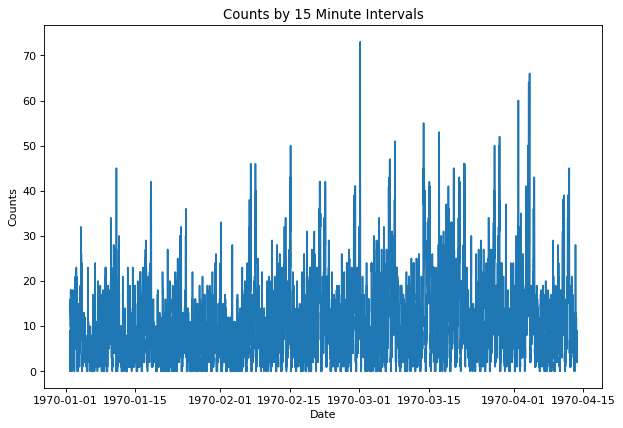

In [61]:
from matplotlib.pyplot import figure

figure(figsize=(9, 6), dpi=80)

plt.plot(df_agg['login_time'], df_agg['Count'])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Counts by 15 Minute Intervals')
plt.show()

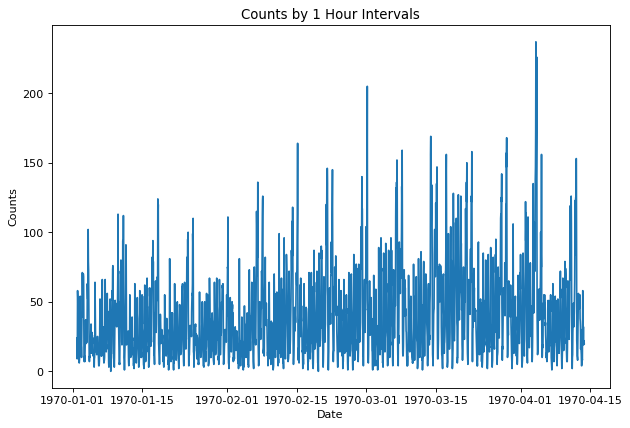

In [62]:
df_agg = pd.DataFrame(df_login.groupby([pd.Grouper(key='login_time', freq='1H')]).sum()).reset_index()
figure(figsize=(9, 6), dpi=80)
plt.plot(df_agg['login_time'], df_agg['Count'])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Counts by 1 Hour Intervals')
plt.show()

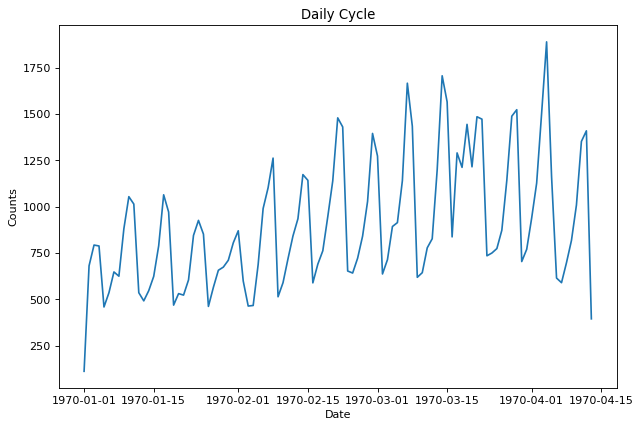

In [63]:
df_agg = pd.DataFrame(df_login.groupby([pd.Grouper(key='login_time', freq='24H')]).sum()).reset_index()
figure(figsize=(9, 6), dpi=80)
plt.plot(df_agg['login_time'], df_agg['Count'])
plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('Daily Cycle')
plt.show()

## Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.







1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

They key measure is time spent in each city and if it goes up or not. This measurement will only be implemented on weekends since weekdays are usually when people work, therefore, driving patterns usually will not change and it was stated that the neighboring cities have complimentary circadian rythm. 

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

I will take a random sample of no less than 100 people from both cities on weekends only. Before the beginning of the test, I will track how much each driver spends in Gotham and Metropolis for a period of 4 weekends and then take the average time each person spent. This is excluding any holidays that might occur since patterns will be irregular on holidays. I am only taking weekend statistics because I am assuming that weekday patterns will not change since people are usually working on weekdays. I will then then randomly assign the reimbursement toll costs on 50% of the sample and the other do not get reimbursed to act as our control group. We will then take the time spent for 4 weekends and average it out. We will track the time using a GPS tracker on people's cars, with their consent of course. 

b) what statistical test(s) you will conduct to verify the significance of the observation

I will then take a z test at a 99% confidence level with the H0 being that there is no difference in the mean proportion of time spent in each city; Ha there is a statistical difference in the mean proportion of time spent in each city.

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

If the results were nonsuccessful, then I would recommend the city to keep collecting tolls. However, if the results are successful, then I would do another experiment to measure the profits made by both city minus the cost of the reimbursement and see if it makes sense financially to permanently implement this reimbursement. 

## Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

## 1. Cleaning, Exploratory Analysis

In [64]:
df_chal.shape

(50000, 12)

In [65]:
df_chal.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are null values in avg_rating_of_driver, phone, and avg_rating_by_driver. We will delete any rows which had null values for phone. Then we will use the average rating of the columns which had null ratings.

In [95]:
df_chal = df_chal.dropna(axis=0, subset=['phone'])

In [104]:
df_chal['avg_rating_of_driver'].fillna(df_chal['avg_rating_of_driver'].mean())

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: avg_rating_of_driver, Length: 49604, dtype: int64

In [105]:
df_chal['avg_rating_by_driver'].fillna(df_chal['avg_rating_by_driver'].mean())

0        5.0
1        5.0
2        5.0
3        4.9
4        4.9
        ... 
49995    4.2
49996    4.0
49997    5.0
49998    3.5
49999    5.0
Name: avg_rating_by_driver, Length: 49604, dtype: float64

In [106]:
df_chal.isnull().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [108]:
df_chal.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,49604.000000,49604.0,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000,49604.000000
mean,2.277256,0.0,1.074991,8.875314,0.375212,60.883832,5.785418,4.758790
std,3.793300,0.0,0.222666,19.989018,0.484182,37.086239,5.669709,0.538397
min,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,1.000000,0.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,0.0,1.000000,0.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,0.0,1.050000,8.700000,1.000000,100.000000,6.930000,5.000000
max,125.000000,0.0,8.000000,100.000000,1.000000,100.000000,160.960000,5.000000


In [146]:
# Create dummy variables for categorical variables

df_features = pd.get_dummies(df_chal,columns=['city','phone','ultimate_black_user'])
df_features.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_0.0,ultimate_black_user_1.0
0,4.0,2014-01-25,0,1.10,2014-06-17,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0.0,2014-01-29,0,1.00,2014-05-05,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3.0,2014-01-06,0,1.00,2014-01-07,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9.0,2014-01-10,0,1.14,2014-06-29,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14.0,2014-01-27,0,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


In [148]:
# Drop any unecessary features

df_features = df_features.drop(['last_trip_date','signup_date'],axis=1)

#### What fraction of the observed users were retained?

In [149]:
active = df_features.trips_in_first_30_days.where(df_features.trips_in_first_30_days == 0, 1)
active.head()

0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: trips_in_first_30_days, dtype: float64

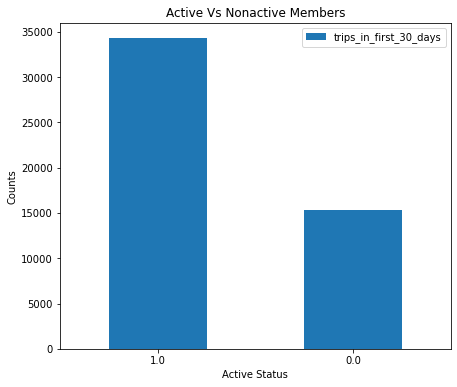

In [150]:
active.value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel('Active Status')
plt.ylabel('Counts')
plt.title('Active Vs Nonactive Members')
plt.legend()
plt.show()

In [151]:
active.value_counts()

1.0    34292
0.0    15312
Name: trips_in_first_30_days, dtype: int64

In [152]:
34292/len(active)

0.6913152165147972

69.13% of members were retained.

In [157]:
# Let's add the active dataframe into a df_features column for later use

df_features['Active'] = active
df_features.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_0.0,ultimate_black_user_1.0,Active
0,4.0,0,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1,1.0
1,0.0,0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0,0.0
2,3.0,0,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0,1.0
3,9.0,0,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1,1.0
4,14.0,0,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0,1.0


## Predictive Modeling

In [169]:
X = df_features.drop(['Active'], axis = 1)
y = df_features['Active']

In [170]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(X)

In [171]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [172]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [173]:
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[3150,    0],
       [   0, 6771]], dtype=int64)

The Random Forest Classifier did a pretty good job in classifying the true positive and true negative

In [174]:
df_importance = pd.DataFrame(zip(list(X.columns),rf.feature_importances_),index=range(X.columns.shape[0]),columns=['feature','importance'])
df_importance.sort_values(by='importance',ascending=False)

,feature,importance
0,trips_in_first_30_days,0.947104
6,avg_rating_by_driver,0.012504
4,weekday_pct,0.011393
5,avg_dist,0.008991
3,surge_pct,0.008227
2,avg_surge,0.007358
9,city_Winterfell,0.001150
8,city_King's Landing,0.000868
13,ultimate_black_user_1.0,0.000541
7,city_Astapor,0.000531


The most important feature in predicting active status is trips_in_first_30_days. Let's look at the weighted precision, recall, and fscore.

In [176]:
precision_recall_fscore_support(y_test,y_pred,average='weighted')

(1.0, 1.0, 1.0, None)

## Conclusion

Our model had a 100% accuracy in predicting wether or not the member is going to be active or not. Therefore, we can confidently use this model to predict 6 months from now and other forms of long term retention. As the number of trips in the first 30 days increases, so does the chance that a rider is active after 6 months. A couple of recommendations for the app is to encourage the riders to use the app by giving incentives to use the app as much as possible in the first 30 days of being active. Secondly, incentivize users to use the apps on weekends. 